# TESTING FOUND DATASETS

# Configuring lab
First, load kaggle api.
https://medium.com/unpackai/how-to-use-kaggle-datasets-in-google-colab-f9b2e4b5767c

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/colab_api/"

Libs

In [4]:
import pandas as pd
import random
from keras.models import Sequential
from keras.layers import Dense

# DATASET - DDoS Dataset
https://www.kaggle.com/datasets/devendra416/ddos-datasets

## Loading data

In [5]:
!kaggle datasets download -d devendra416/ddos-datasets

100% 2.68G/2.68G [02:12<00:00, 24.3MB/s]
100% 2.68G/2.68G [02:12<00:00, 21.8MB/s]


In [6]:
!unzip ddos-datasets.zip

Archive:  ddos-datasets.zip
  inflating: ddos_balanced/final_dataset.csv  
  inflating: ddos_imbalanced/unbalaced_20_80_dataset.csv  


In [7]:
columns = [
    "Flow ID",
"Src IP",
"Src Port",
"Dst IP",
"Dst Port",
"Protocol",
"Timestamp",
"Flow Duration",
"Tot Fwd Pkts",
"Tot Bwd Pkts",
"TotLen Fwd Pkts",
"TotLen Bwd Pkts",
"Fwd Pkt Len Max",
"Fwd Pkt Len Min",
"Fwd Pkt Len Mean",
"Fwd Pkt Len Std",
"Bwd Pkt Len Max",
"Bwd Pkt Len Min",
"Bwd Pkt Len Mean",
"Bwd Pkt Len Std",
"Flow Byts/s",
"Flow Pkts/s",
"Flow IAT Mean",
"Flow IAT Std",
"Flow IAT Max",
"Flow IAT Min",
"Fwd IAT Tot",
"Fwd IAT Mean",
"Fwd IAT Std",
"Fwd IAT Max",
"Fwd IAT Min",
"Bwd IAT Tot",
"Bwd IAT Mean",
"Bwd IAT Std",
"Bwd IAT Max",
"Bwd IAT Min",
"Fwd PSH Flags",
"Bwd PSH Flags",
"Fwd URG Flags",
"Bwd URG Flags",
"Fwd Header Len",
"Bwd Header Len",
"Fwd Pkts/s",
"Bwd Pkts/s",
"Pkt Len Min",
"Pkt Len Max",
"Pkt Len Mean",
"Pkt Len Std",
"Pkt Len Var",
"FIN Flag Cnt",
"SYN Flag Cnt",
"RST Flag Cnt",
"PSH Flag Cnt",
"ACK Flag Cnt",
"URG Flag Cnt",
"CWE Flag Count",
"ECE Flag Cnt",
"Down/Up Ratio",
"Pkt Size Avg",
"Fwd Seg Size Avg",
"Bwd Seg Size Avg",
"Fwd Byts/b Avg",
"Fwd Pkts/b Avg",
"Fwd Blk Rate Avg",
"Bwd Byts/b Avg",
"Bwd Pkts/b Avg",
"Bwd Blk Rate Avg",
"Subflow Fwd Pkts",
"Subflow Fwd Byts",
"Subflow Bwd Pkts",
"Subflow Bwd Byts",
"Init Fwd Win Byts",
"Init Bwd Win Byts",
"Fwd Act Data Pkts",
"Fwd Seg Size Min",
"Active Mean",
"Active Std",
"Active Max",
"Active Min",
"Idle Mean",
"Idle Std",
"Idle Max",
"Idle Min",
"Label",
]

In [8]:
to_ignore = ["Flow ID",
            "Protocol",
            "Flow Duration",
            "Flow Byts/s",
            "Flow Pkts/s",
            'Bwd Blk Rate Avg', 
            'Bwd Byts/b Avg', 
            'Bwd PSH Flags',
            'Bwd Pkts/b Avg', 
            'Bwd URG Flags', 
            'FIN Flag Cnt',
            'Fwd Blk Rate Avg', 
            'Fwd Byts/b Avg', 
            'Fwd PSH Flags',
            'Fwd Pkts/b Avg', 
            'Fwd URG Flags', 
            'URG Flag Cnt',
            "Tot Bwd Pkts",
            "TotLen Fwd Pkts",
            "TotLen Bwd Pkts",
            "Bwd Pkt Len Max",
            "Bwd Pkt Len Mean",
            "Bwd Pkt Len Std",
            "Bwd IAT Tot",
            "Bwd IAT Mean",
            "Bwd IAT Std",
            "Bwd IAT Max",
            "Bwd IAT Min",
            "Bwd Header Len",
            "Bwd Pkts/s",
            "Bwd Seg Size Avg",
            "Subflow Bwd Pkts",
            "Subflow Bwd Byts",
            "Init Bwd Win Byts",]

In [9]:
for i in to_ignore:
  try:
    columns.remove(i)
  except ValueError:
    print("Not in list")

In [10]:
def gather_sample(filename, sample_size):
  n = sum(1 for line in open(filename))-1  # Calculate number of rows in file
  s = n//sample_size  # sample size of 10%
  # Works -> 10, 20, 30, 40, 50, 60, 70 (Warnings?), 
  # 8092510, 13594220
  # Each file has the amount of lines.: 7616509, 12794627
  print("There are %s lines." %(str(n)))
  skip = sorted(random.sample(range(1, n+1), n-s))  # n+1 to compensate for header 
  #print(skip)
  df = pd.read_csv(filename, skiprows=skip)
  print("Using %i lines, which represent %f%% of the total" %(s, (df.size/n)))
  return df

In [11]:
print(sum(1 for line in open("/content/ddos_imbalanced/unbalaced_20_80_dataset.csv"))-1)
print(sum(1 for line in open("/content/ddos_balanced/final_dataset.csv"))-1)

7616509
12794627


In [12]:
ddos_dataset_unbalanced = gather_sample("/content/ddos_imbalanced/unbalaced_20_80_dataset.csv", 10)
ddos_dataset_balanced = gather_sample("/content/ddos_balanced/final_dataset.csv", 10)
print(ddos_dataset_unbalanced.size) 
print(ddos_dataset_balanced.size)

There are 7616509 lines.
Using 761650 lines, which represent 8.499990% of the total
There are 12794627 lines.
Using 1279462 lines, which represent 8.499995% of the total
64740250
108754270


In [13]:
ddos_dataset_balanced.columns

Index(['Unnamed: 0', 'Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port',
       'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag

In [14]:
ddos_dataset_balanced.drop(columns=to_ignore)

,Unnamed: 0,Src IP,Src Port,Dst IP,Dst Port,Timestamp,Tot Fwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,624,192.168.4.118,4504,203.73.24.75,80,12/06/2010 08:34:32 AM,29,86.0,0.0,2.965517,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
1,632,192.168.4.118,4508,203.73.24.75,80,12/06/2010 08:34:37 AM,2,70.0,0.0,35.000000,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
2,752,192.168.1.103,1725,97.74.144.108,80,12/06/2010 08:35:28 AM,47,110.0,0.0,6.170213,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
3,799,192.168.4.118,4521,203.73.24.75,80,12/06/2010 08:36:32 AM,1,0.0,0.0,0.000000,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
4,803,192.168.4.118,4522,203.73.24.75,80,12/06/2010 08:36:33 AM,1,0.0,0.0,0.000000,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279457,7817292,5.39.216.253,32270,172.31.67.83,3389,20/02/2018 09:29:04,13,773.0,0.0,114.769231,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1279458,1785605,172.31.67.80,57878,172.31.0.2,53,20/02/2018 10:16:43,1,42.0,42.0,42.000000,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1279459,6179050,172.31.64.37,56337,172.31.0.2,53,20/02/2018 12:57:36,1,45.0,45.0,45.000000,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1279460,6867628,172.31.67.107,445,183.89.184.71,56186,20/02/2018 08:44:31,2,0.0,0.0,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [15]:
ddos_dataset_balanced.head(10)

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,624,192.168.4.118-203.73.24.75-4504-80-6,192.168.4.118,4504,203.73.24.75,80,6,12/06/2010 08:34:32 AM,3974862,29,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
1,632,192.168.4.118-203.73.24.75-4508-80-6,192.168.4.118,4508,203.73.24.75,80,6,12/06/2010 08:34:37 AM,468629,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
2,752,192.168.1.103-97.74.144.108-1725-80-6,192.168.1.103,1725,97.74.144.108,80,6,12/06/2010 08:35:28 AM,23221098,47,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
3,799,192.168.4.118-203.73.24.75-4521-80-6,192.168.4.118,4521,203.73.24.75,80,6,12/06/2010 08:36:32 AM,134,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
4,803,192.168.4.118-203.73.24.75-4522-80-6,192.168.4.118,4522,203.73.24.75,80,6,12/06/2010 08:36:33 AM,83,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
5,826,192.168.4.118-203.73.24.75-4528-80-6,192.168.4.118,4528,203.73.24.75,80,6,12/06/2010 08:36:38 AM,3192566,51,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
6,860,192.168.4.118-203.73.24.75-4534-80-6,192.168.4.118,4534,203.73.24.75,80,6,12/06/2010 08:36:58 AM,3130574,50,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
7,861,192.168.4.118-203.73.24.75-4534-80-6,192.168.4.118,4534,203.73.24.75,80,6,12/06/2010 08:37:01 AM,79,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
8,866,192.168.4.118-203.73.24.75-4536-80-6,192.168.4.118,4536,203.73.24.75,80,6,12/06/2010 08:37:02 AM,490,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
9,868,192.168.4.118-203.73.24.75-4537-80-6,192.168.4.118,4537,203.73.24.75,80,6,12/06/2010 08:37:02 AM,6,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos


In [16]:
df = ddos_dataset_balanced.drop(columns=to_ignore)

In [17]:
df.shape

(1279462, 51)

In [18]:
df.head(5)

,Unnamed: 0,Src IP,Src Port,Dst IP,Dst Port,Timestamp,Tot Fwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,624,192.168.4.118,4504,203.73.24.75,80,12/06/2010 08:34:32 AM,29,86.0,0.0,2.965517,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
1,632,192.168.4.118,4508,203.73.24.75,80,12/06/2010 08:34:37 AM,2,70.0,0.0,35.000000,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
2,752,192.168.1.103,1725,97.74.144.108,80,12/06/2010 08:35:28 AM,47,110.0,0.0,6.170213,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
3,799,192.168.4.118,4521,203.73.24.75,80,12/06/2010 08:36:32 AM,1,0.0,0.0,0.000000,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
4,803,192.168.4.118,4522,203.73.24.75,80,12/06/2010 08:36:33 AM,1,0.0,0.0,0.000000,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos


In [19]:
df.isnull().sum()

Unnamed: 0           0
Src IP               0
Src Port             0
Dst IP               0
Dst Port             0
Timestamp            0
Tot Fwd Pkts         0
Fwd Pkt Len Max      0
Fwd Pkt Len Min      0
Fwd Pkt Len Mean     0
Fwd Pkt Len Std      0
Bwd Pkt Len Min      0
Flow IAT Mean        0
Flow IAT Std         0
Flow IAT Max         0
Flow IAT Min         0
Fwd IAT Tot          0
Fwd IAT Mean         0
Fwd IAT Std          0
Fwd IAT Max          0
Fwd IAT Min          0
Fwd Header Len       0
Fwd Pkts/s           0
Pkt Len Min          0
Pkt Len Max          0
Pkt Len Mean         0
Pkt Len Std          0
Pkt Len Var          0
SYN Flag Cnt         0
RST Flag Cnt         0
PSH Flag Cnt         0
ACK Flag Cnt         0
CWE Flag Count       0
ECE Flag Cnt         0
Down/Up Ratio        0
Pkt Size Avg         0
Fwd Seg Size Avg     0
Subflow Fwd Pkts     0
Subflow Fwd Byts     0
Init Fwd Win Byts    0
Fwd Act Data Pkts    0
Fwd Seg Size Min     0
Active Mean          0
Active Std 

In [20]:
df.shape

(1279462, 51)

We can see there's 12794627 lines, 51 columns remaining. Time to study each column and verify if they matter.

## Variables

### IPs and Ports

Studying variables ["Src IP", "Src Port", "Dst IP", "Dst Port"]. To start, let us gather a sample of it.


In [21]:
df["Src IP"]

0          192.168.4.118
1          192.168.4.118
2          192.168.1.103
3          192.168.4.118
4          192.168.4.118
               ...      
1279457     5.39.216.253
1279458     172.31.67.80
1279459     172.31.64.37
1279460    172.31.67.107
1279461     172.31.67.58
Name: Src IP, Length: 1279462, dtype: object

In [22]:
df["Src Port"]

0           4504
1           4508
2           1725
3           4521
4           4522
           ...  
1279457    32270
1279458    57878
1279459    56337
1279460      445
1279461    61580
Name: Src Port, Length: 1279462, dtype: int64

In [23]:
df["Dst IP"]

0           203.73.24.75
1           203.73.24.75
2          97.74.144.108
3           203.73.24.75
4           203.73.24.75
               ...      
1279457     172.31.67.83
1279458       172.31.0.2
1279459       172.31.0.2
1279460    183.89.184.71
1279461       172.31.0.2
Name: Dst IP, Length: 1279462, dtype: object

In [24]:
df["Dst Port"]

0             80
1             80
2             80
3             80
4             80
           ...  
1279457     3389
1279458       53
1279459       53
1279460    56186
1279461       53
Name: Dst Port, Length: 1279462, dtype: int64

Src IP, Dst IP are string types, while the Ports are Int64. Considering computers and networking, the port is mostly used to tell where in the IP to send the message, so it's more of a categorical type of data?

Even more, do we really need the IP, considering that it may change across machines? If we train the model with some IPs, it is possible that the AI only study for these specific IP and not others. Ports may vary as well, but there seem to be a good variety of ports. 

However, since each line seem to be a collection of web calls, we'd have to have an IP as "Src of call"...

### Timestamp

Studying timestamp

In [25]:
df["Timestamp"]

0          12/06/2010 08:34:32 AM
1          12/06/2010 08:34:37 AM
2          12/06/2010 08:35:28 AM
3          12/06/2010 08:36:32 AM
4          12/06/2010 08:36:33 AM
                    ...          
1279457       20/02/2018 09:29:04
1279458       20/02/2018 10:16:43
1279459       20/02/2018 12:57:36
1279460       20/02/2018 08:44:31
1279461       20/02/2018 12:43:11
Name: Timestamp, Length: 1279462, dtype: object

In [26]:
df["Timestamp"].head()

0    12/06/2010 08:34:32 AM
1    12/06/2010 08:34:37 AM
2    12/06/2010 08:35:28 AM
3    12/06/2010 08:36:32 AM
4    12/06/2010 08:36:33 AM
Name: Timestamp, dtype: object

Timestamp seems to be date and time of the event. Do we have to consider it, since the dates happen in different, future times?

### Tot Fwd Pkts
tot_fw_pk - Total packets in the forward direction

In [27]:
df["Tot Fwd Pkts"]

0          29
1           2
2          47
3           1
4           1
           ..
1279457    13
1279458     1
1279459     1
1279460     2
1279461     1
Name: Tot Fwd Pkts, Length: 1279462, dtype: int64

In [28]:
df["Tot Fwd Pkts"].head()

0    29
1     2
2    47
3     1
4     1
Name: Tot Fwd Pkts, dtype: int64

### Fwd Pkt Len

- Fwd Pkt Len Max - fw_pkt_l_max - Maximum size of packet in forward direction
- Fwd Pkt Len Min - fw_pkt_l_min - Minimum size of packet in forward direction
- Fwd Pkt Len Mean - fw_pkt_l_avg - Average size of packet in forward direction
- Fwd Pkt Len Std - fw_pkt_l_std - Standard deviation size of packet in forward direction

These seem like they're mostly used for the size of the forwarding package.

In [29]:
df["Tot Fwd Pkts"]

0          29
1           2
2          47
3           1
4           1
           ..
1279457    13
1279458     1
1279459     1
1279460     2
1279461     1
Name: Tot Fwd Pkts, Length: 1279462, dtype: int64

In [30]:
df["Tot Fwd Pkts"].head()

0    29
1     2
2    47
3     1
4     1
Name: Tot Fwd Pkts, dtype: int64

### Flow IAT

- Flow IAT Mean - fl_iat_avg - Average time between two flows
- Flow IAT Std - fl_iat_std - Standard deviation time two flows
- Flow IAT Max - fl_iat_max - Maximum time between two flows
- Flow IAT Min - fl_iat_min - Minimum time between two flows

These seem like they're mostly used for flow time between two flows.

In [31]:
df["Flow IAT Mean"]

0           55206.416667
1           78104.833333
2          187266.919355
3             134.000000
4              83.000000
               ...      
1279457    147428.250000
1279458       313.000000
1279459     12558.000000
1279460       138.000000
1279461       303.000000
Name: Flow IAT Mean, Length: 1279462, dtype: float64

In [32]:
df["Flow IAT Mean"].head()

0     55206.416667
1     78104.833333
2    187266.919355
3       134.000000
4        83.000000
Name: Flow IAT Mean, dtype: float64

In [33]:
df["Flow IAT Std"]

0          1.954783e+05
1          1.191181e+05
2          1.400895e+06
3          0.000000e+00
4          0.000000e+00
               ...     
1279457    2.120287e+05
1279458    0.000000e+00
1279459    0.000000e+00
1279460    0.000000e+00
1279461    0.000000e+00
Name: Flow IAT Std, Length: 1279462, dtype: float64

In [34]:
df["Flow IAT Std"].head()

0    1.954783e+05
1    1.191181e+05
2    1.400895e+06
3    0.000000e+00
4    0.000000e+00
Name: Flow IAT Std, dtype: float64

In [35]:
df["Flow IAT Max"]

0           1566821.0
1            235236.0
2          15094326.0
3               134.0
4                83.0
              ...    
1279457      951550.0
1279458         313.0
1279459       12558.0
1279460         138.0
1279461         303.0
Name: Flow IAT Max, Length: 1279462, dtype: float64

In [36]:
df["Flow IAT Max"].head()

0     1566821.0
1      235236.0
2    15094326.0
3         134.0
4          83.0
Name: Flow IAT Max, dtype: float64

In [37]:
df["Flow IAT Min"]

0            167.0
1              6.0
2            155.0
3            134.0
4             83.0
            ...   
1279457       24.0
1279458      313.0
1279459    12558.0
1279460      138.0
1279461      303.0
Name: Flow IAT Min, Length: 1279462, dtype: float64

In [38]:
df["Flow IAT Min"].head()

0    167.0
1      6.0
2    155.0
3    134.0
4     83.0
Name: Flow IAT Min, dtype: float64

### Fwd IAT

- Fwd IAT Tot - fw_iat_tot - Total time between two packets sent in the forward direction
- Fwd IAT Mean - fw_iat_avg - Mean time between two packets sent in the forward direction
- Fwd IAT Std - fw_iat_std - Standard deviation time between two packets sent in the forward direction
- Fwd IAT Max - fw_iat_max - Maximum time between two packets sent in the forward direction
- Fwd IAT Min - fw_iat_min - Minimum time between two packets sent in the forward direction

These seem like they're mostly used for flow time between two flows.

In [39]:
df["Fwd IAT Tot"]

0          3735347.0
1               92.0
2          8018116.0
3                0.0
4                0.0
             ...    
1279457    2948565.0
1279458          0.0
1279459          0.0
1279460        138.0
1279461          0.0
Name: Fwd IAT Tot, Length: 1279462, dtype: float64

In [40]:
df["Fwd IAT Tot"].head()

0    3735347.0
1         92.0
2    8018116.0
3          0.0
4          0.0
Name: Fwd IAT Tot, dtype: float64

In [41]:
df["Fwd IAT Mean"]

0          133405.250000
1              92.000000
2          174306.869565
3               0.000000
4               0.000000
               ...      
1279457    245713.750000
1279458         0.000000
1279459         0.000000
1279460       138.000000
1279461         0.000000
Name: Fwd IAT Mean, Length: 1279462, dtype: float64

In [42]:
df["Fwd IAT Mean"].head()

0    133405.250000
1        92.000000
2    174306.869565
3         0.000000
4         0.000000
Name: Fwd IAT Mean, dtype: float64

In [43]:
df["Fwd IAT Std"]

0          341775.688712
1               0.000000
2          630711.570393
3               0.000000
4               0.000000
               ...      
1279457    342120.515596
1279458         0.000000
1279459         0.000000
1279460         0.000000
1279461         0.000000
Name: Fwd IAT Std, Length: 1279462, dtype: float64

In [44]:
df["Fwd IAT Std"].head()

0    341775.688712
1         0.000000
2    630711.570393
3         0.000000
4         0.000000
Name: Fwd IAT Std, dtype: float64

In [45]:
df["Fwd IAT Max"]

0          1805015.0
1               92.0
2          3787574.0
3                0.0
4                0.0
             ...    
1279457    1312807.0
1279458          0.0
1279459          0.0
1279460        138.0
1279461          0.0
Name: Fwd IAT Max, Length: 1279462, dtype: float64

In [46]:
df["Fwd IAT Max"].head()

0    1805015.0
1         92.0
2    3787574.0
3          0.0
4          0.0
Name: Fwd IAT Max, dtype: float64

In [47]:
df["Fwd IAT Min"]

0            167.0
1             92.0
2            155.0
3              0.0
4              0.0
            ...   
1279457    11928.0
1279458        0.0
1279459        0.0
1279460      138.0
1279461        0.0
Name: Fwd IAT Min, Length: 1279462, dtype: float64

In [48]:
df["Fwd IAT Min"].head()

0    167.0
1     92.0
2    155.0
3      0.0
4      0.0
Name: Fwd IAT Min, dtype: float64

### Fwd Pkts/s

fw_pkt_s - Number of forward packets per second

In [49]:
df["Fwd Pkts/s"]

0              7.295851
1              4.267768
2              2.024021
3           7462.686567
4          12048.192771
               ...     
1279457        4.408924
1279458     3194.888179
1279459       79.630514
1279460    14492.753623
1279461     3300.330033
Name: Fwd Pkts/s, Length: 1279462, dtype: float64

In [50]:
df["Fwd Pkts/s"].head()

0        7.295851
1        4.267768
2        2.024021
3     7462.686567
4    12048.192771
Name: Fwd Pkts/s, dtype: float64

### Pkt Len

- Pkt Len Mean - pkt_len_avg - Mean length of a flow
- Pkt Len Std - pkt_len_std - Standard deviation length of a flow
- Pkt Len Max - pkt_len_max - Maximum length of a flow
- Pkt Len Min - pkt_len_min - Minimum length of a flow
- Pkt Len Var - pkt_len_va - Minimum inter-arrival time of packet

These seem like they're mostly used for flow length

In [51]:
df["Pkt Len Mean"]

0          809.418919
1           92.375000
2          811.809524
3            0.000000
4            0.000000
              ...    
1279457    146.500000
1279458     47.333333
1279459     63.666667
1279460      0.000000
1279461     52.333333
Name: Pkt Len Mean, Length: 1279462, dtype: float64

In [52]:
df["Pkt Len Mean"].head()

0    809.418919
1     92.375000
2    811.809524
3      0.000000
4      0.000000
Name: Pkt Len Mean, dtype: float64

In [53]:
df["Pkt Len Std"]

0          728.862428
1          234.275746
2          717.692443
3            0.000000
4            0.000000
              ...    
1279457    288.566036
1279458      9.237604
1279459     32.331615
1279460      0.000000
1279461      9.237604
Name: Pkt Len Std, Length: 1279462, dtype: float64

In [54]:
df["Pkt Len Std"].head()

0    728.862428
1    234.275746
2    717.692443
3      0.000000
4      0.000000
Name: Pkt Len Std, dtype: float64

In [55]:
df["Pkt Len Max"]

0          1460.0
1           669.0
2          1460.0
3             0.0
4             0.0
            ...  
1279457    1179.0
1279458      58.0
1279459     101.0
1279460       0.0
1279461      63.0
Name: Pkt Len Max, Length: 1279462, dtype: float64

In [56]:
df["Pkt Len Max"].head()

0    1460.0
1     669.0
2    1460.0
3       0.0
4       0.0
Name: Pkt Len Max, dtype: float64

In [57]:
df["Pkt Len Min"]

0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
           ... 
1279457     0.0
1279458    42.0
1279459    45.0
1279460     0.0
1279461    47.0
Name: Pkt Len Min, Length: 1279462, dtype: float64

In [58]:
df["Pkt Len Min"].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Pkt Len Min, dtype: float64

### Flag Count

- SYN Flag Cnt - syn_cnt - Number of packets with SYN
- RST Flag Cnt - rst_cnt - Number of packets with RST
- PSH Flag Cnt - pst_cnt - Number of packets with PUSH
- ACK Flag Cnt - ack_cnt - Number of packets with ACK
- CWE Flag Count - cwe_cnt - Number of packets with CWE
- ECE Flag Cnt - ece_cnt - Number of packets with ECE

Counting the amount of flags per package in an entry.

In [59]:
df["SYN Flag Cnt"]

0          1
1          1
2          1
3          0
4          0
          ..
1279457    0
1279458    0
1279459    0
1279460    0
1279461    0
Name: SYN Flag Cnt, Length: 1279462, dtype: int64

In [60]:
df["SYN Flag Cnt"].head()

0    1
1    1
2    1
3    0
4    0
Name: SYN Flag Cnt, dtype: int64

In [61]:
df["SYN Flag Cnt"].sum()

172741

In [62]:
df["RST Flag Cnt"]

0          0
1          0
2          0
3          0
4          0
          ..
1279457    1
1279458    0
1279459    0
1279460    0
1279461    0
Name: RST Flag Cnt, Length: 1279462, dtype: int64

In [63]:
df["RST Flag Cnt"].head()

0    0
1    0
2    0
3    0
4    0
Name: RST Flag Cnt, dtype: int64

In [64]:
df["RST Flag Cnt"].sum()

141770

In [65]:
df["PSH Flag Cnt"]

0          0
1          0
2          0
3          0
4          0
          ..
1279457    1
1279458    0
1279459    0
1279460    0
1279461    0
Name: PSH Flag Cnt, Length: 1279462, dtype: int64

In [66]:
df["PSH Flag Cnt"].head()

0    0
1    0
2    0
3    0
4    0
Name: PSH Flag Cnt, dtype: int64

In [67]:
df["PSH Flag Cnt"].sum()

256815

In [68]:
df["ACK Flag Cnt"]

0          0
1          0
2          0
3          1
4          1
          ..
1279457    0
1279458    0
1279459    0
1279460    1
1279461    0
Name: ACK Flag Cnt, Length: 1279462, dtype: int64

In [69]:
df["ACK Flag Cnt"].head()

0    0
1    0
2    0
3    1
4    1
Name: ACK Flag Cnt, dtype: int64

In [70]:
df["ACK Flag Cnt"].sum()

655015

In [71]:
df["CWE Flag Count"]

0          0
1          0
2          0
3          0
4          0
          ..
1279457    0
1279458    0
1279459    0
1279460    0
1279461    0
Name: CWE Flag Count, Length: 1279462, dtype: int64

In [72]:
df["CWE Flag Count"].head()

0    0
1    0
2    0
3    0
4    0
Name: CWE Flag Count, dtype: int64

In [73]:
df["CWE Flag Count"].sum()

107361

In [74]:
df["ECE Flag Cnt"]

0          0
1          0
2          0
3          0
4          0
          ..
1279457    1
1279458    0
1279459    0
1279460    0
1279461    0
Name: ECE Flag Cnt, Length: 1279462, dtype: int64

In [75]:
df["ECE Flag Cnt"].head()

0    0
1    0
2    0
3    0
4    0
Name: ECE Flag Cnt, dtype: int64

In [76]:
df["ECE Flag Cnt"].sum()

247798

### Down/Up Ratio

down_up_ratio - Download and upload ratio

In [77]:
df["Down/Up Ratio"]

0          1.0
1          2.0
2          1.0
3          1.0
4          1.0
          ... 
1279457    0.0
1279458    1.0
1279459    1.0
1279460    0.0
1279461    1.0
Name: Down/Up Ratio, Length: 1279462, dtype: float64

In [78]:
df["Down/Up Ratio"].head()

0    1.0
1    2.0
2    1.0
3    1.0
4    1.0
Name: Down/Up Ratio, dtype: float64

### Label

This is our Y variable. DDoS or not.

In [79]:
df["Label"]

0            ddos
1            ddos
2            ddos
3            ddos
4            ddos
            ...  
1279457    Benign
1279458    Benign
1279459    Benign
1279460    Benign
1279461    Benign
Name: Label, Length: 1279462, dtype: object

In [80]:
df.Label.value_counts()

ddos      647470
Benign    631992
Name: Label, dtype: int64

Binary result. Either it is a ddos attack (ddos) or it isn't (Benign).
We could overwrite them and say that Benign is 0, ddos is 1, making the AI a binary classification type

## Variables - Suggestions

- Required.:

Label (output)

- To include.:

Fwd pkts, Flow IAT, Fwd Pkts/s, Flag counts,


Suggestion.:
- Exclude "IP"
- Include "Ports"
- Exclude "Timestamp"
- Include "Tot Fwd Pkts"
- Include "Fwd Pkt Len Max"
- Include "Fwd Pkt Len Min"
- Include "Fwd Pkt Len Mean"
- Include "Fwd Pkt Len Std"
- Exclude "Bwd Pkt Len Min"
- Include "Flow IAT Mean"
- Include "Flow IAT Std" 
- Include "Flow IAT Max" 
- Include "Flow IAT Min" 
- Exclude "Fwd Header Len"
- Include "Fwd Pkts/s"
- Exclude "Pkt Len Min"
- Exclude "Pkt Len Max"
- Exclude "Pkt Len Mean"
- Exclude "Pkt Len Std"
- Exclude "Pkt Len Var"
- Include "SYN Flag Cnt"
- Include "RST Flag Cnt"
- Include "PSH Flag Cnt"
- Include "ACK Flag Cnt"
- Include "CWE Flag Count"
- Include "ECE Flag Cnt"
- Exclude "Down/Up Ratio"
- Exclude "Pkt Size Avg"
- Exclude "Fwd Seg Size Avg"
- Exclude "Subflow Fwd Pkts"
- Exclude "Subflow Fwd Byts"
- Exclude "Init Fwd Win Byts"
- Exclude "Fwd Act Data Pkts"
- Exclude "Fwd Seg Size Min"
- Exclude "Active Mean"
- Exclude "Active Std"
- Exclude "Active Max"
- Exclude "Active Min"
- Exclude "Idle Mean"
- Exclude "Idle Std"
- Exclude "Idle Max"
- Exclude "Idle Min"
- Include "Label"


Thoughts?

## Treating data

First, removing the extra columns

In [81]:
to_remove = [
  "Unnamed: 0",
  "Src IP", 
  #"Src Port",
  "Dst IP", 
  #"Dst Port",
  "Timestamp",
  "Bwd Pkt Len Min",
  "Fwd Header Len",
  "Pkt Len Min",
  "Pkt Len Max",
  "Pkt Len Mean",
  "Pkt Len Std",
  "Pkt Len Var",
  "Down/Up Ratio",
  "Pkt Size Avg",
  "Fwd Seg Size Avg",
  "Subflow Fwd Pkts",
  "Subflow Fwd Byts",
  "Init Fwd Win Byts",
  "Fwd Act Data Pkts",
  "Fwd Seg Size Min",
  "Active Mean",
  "Active Std",
  "Active Max",
  "Active Min",
  "Idle Mean",
  "Idle Std",
  "Idle Max",
  "Idle Min",
]

In [82]:
df = df.drop(columns=to_remove)

Removing white space and "/"

In [83]:
df.columns = df.columns.str.replace(' ', '')
df.columns = df.columns.str.replace('/', '')

Confirming

In [84]:
df.columns

Index(['SrcPort', 'DstPort', 'TotFwdPkts', 'FwdPktLenMax', 'FwdPktLenMin',
       'FwdPktLenMean', 'FwdPktLenStd', 'FlowIATMean', 'FlowIATStd',
       'FlowIATMax', 'FlowIATMin', 'FwdIATTot', 'FwdIATMean', 'FwdIATStd',
       'FwdIATMax', 'FwdIATMin', 'FwdPktss', 'SYNFlagCnt', 'RSTFlagCnt',
       'PSHFlagCnt', 'ACKFlagCnt', 'CWEFlagCount', 'ECEFlagCnt', 'Label'],
      dtype='object')

Splitting into X & Y

In [85]:
X = df
y = df.pop('Label').map({'Benign': 0, 'ddos': 1})

In [86]:
X.head(5)

,SrcPort,DstPort,TotFwdPkts,FwdPktLenMax,FwdPktLenMin,FwdPktLenMean,FwdPktLenStd,FlowIATMean,FlowIATStd,FlowIATMax,...,FwdIATStd,FwdIATMax,FwdIATMin,FwdPktss,SYNFlagCnt,RSTFlagCnt,PSHFlagCnt,ACKFlagCnt,CWEFlagCount,ECEFlagCnt
0,4504,80,29,86.0,0.0,2.965517,15.969799,55206.416667,1.954783e+05,1566821.0,...,341775.688712,1805015.0,167.0,7.295851,1,0,0,0,0,0
1,4508,80,2,70.0,0.0,35.000000,49.497475,78104.833333,1.191181e+05,235236.0,...,0.000000,92.0,92.0,4.267768,1,0,0,0,0,0
2,1725,80,47,110.0,0.0,6.170213,24.136675,187266.919355,1.400895e+06,15094326.0,...,630711.570393,3787574.0,155.0,2.024021,1,0,0,0,0,0
3,4521,80,1,0.0,0.0,0.000000,0.000000,134.000000,0.000000e+00,134.0,...,0.000000,0.0,0.0,7462.686567,0,0,0,1,0,0
4,4522,80,1,0.0,0.0,0.000000,0.000000,83.000000,0.000000e+00,83.0,...,0.000000,0.0,0.0,12048.192771,0,0,0,1,0,0


In [87]:
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: Label, dtype: int64

Normalizing data to avoid large values

Training

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.9)

In [89]:
input_shape = [X_train.shape[1]]

In [90]:
input_shape

[23]

## Modelling ML

In [91]:
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers

The target is Label (ddos or not). Therefore, we should count the available input features and exclude the output from the list.

In [92]:
#model = keras.Sequential([
#    layers.BatchNormalization(input_shape=input_shape),
#    layers.Dense(256, activation='relu'),
#    layers.BatchNormalization(),
#    layers.Dropout(0.3),
#    layers.Dense(256, activation='relu'),
#    layers.BatchNormalization(),
#    layers.Dropout(0.3),
#    layers.Dense(1, activation='sigmoid'),
#])

In [93]:
#model.compile(
#    optimizer='adam',
#    loss='binary_crossentropy',
#    metrics=['binary_accuracy'],
#)

In [94]:
#rna = models.Sequential([Dense(64, activation="sigmoid", input_shape=input_shape),
#                         Dense(32, activation="relu"),
#                         Dense(16, activation="relu"),
#                         Dense(1, activation='sigmoid'),
#])
#rna.summary()

In [95]:
rna = models.Sequential([Dense(256, activation="sigmoid", input_shape=input_shape),
                         Dense(128, activation="relu"),
                         Dense(64, activation="relu"),
                         Dense(32, activation="relu"),
                         Dense(16, activation="relu"),
                         Dense(1, activation='sigmoid'),
])
rna.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               6144      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 49,921
Trainable params: 49,921
Non-traina

In [ ]:
from tensorflow.keras import optimizers

sgd = optimizers.SGD(learning_rate=0.01)
rna.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)

# 2022-08-23 ~ 3 h 40 mins - 1000
# 2022-09-13 ~ 4 h 38 mins 15 s - 1000
# 2022-09-26 ~ 52 mins - 200 - 67%
# 2022-09-26 ~ 51 mins - 200 - 50%
# 2022-09-26 ~ x mins - 100 - 60%
# 2022-10-10 ~ 25 mins - 100 - 100 epochs, 209 batch, (sigmoid 64, relu 32, relu 16, sigmoid 1) - 81%
#rna.fit(X_train, y_train, epochs=10, batch_size=209) 
#history = rna.fit(X_train, y_train, epochs=1000, batch_size=209) 
history = rna.fit(X_train, y_train, epochs=100, batch_size=209)

history_df = pd.DataFrame(history.history)


Epoch 1/100
5510/5510 [==============================] - 20s 3ms/step - loss: 0.4123 - accuracy: 0.7973
Epoch 2/100
5510/5510 [==============================] - 18s 3ms/step - loss: 0.4139 - accuracy: 0.7914
Epoch 3/100
5510/5510 [==============================] - 18s 3ms/step - loss: 0.4208 - accuracy: 0.7776
Epoch 4/100
5510/5510 [==============================] - 17s 3ms/step - loss: 0.4187 - accuracy: 0.7789
Epoch 5/100
5510/5510 [==============================] - 19s 3ms/step - loss: 0.4166 - accuracy: 0.7829
Epoch 6/100
5510/5510 [==============================] - 17s 3ms/step - loss: 0.4271 - accuracy: 0.7863
Epoch 7/100
5510/5510 [==============================] - 17s 3ms/step - loss: 0.4249 - accuracy: 0.7768
Epoch 8/100
5510/5510 [==============================] - 17s 3ms/step - loss: 0.4285 - accuracy: 0.7843
Epoch 9/100
5510/5510 [==============================] - 17s 3ms/step - loss: 0.4280 - accuracy: 0.7813
Epoch 10/100
5510/5510 [==============================] - 17s 3m

In [ ]:
history_df.keys()

In [ ]:
#history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
#history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

In [ ]:
rna.predict(X_train[:10])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

custodl = history_df["loss"]
exatidaodl = history_df["accuracy"]

epocasdl = range(1, len(custodl) + 1)

plt.plot(epocasdl, custodl, 'b')
plt.title('Valor da função de custo')
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.show()

plt.plot(epocasdl, exatidaodl, 'r')
plt.title('Valor da exatidão')
plt.xlabel('Épocas')
plt.ylabel('Exatidão')
plt.show()

## Result analysis

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
fig = go.Figure()

fig.add_trace(go.Scatter(mode="markers", x=epocasdl, y=custodl))

fig.update_xaxes(type="log")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [ ]:
def plot_metrics(history):
  metrics = ['loss', 'accuracy',]# 'precision', 'recall']
  plt.figure(figsize=(16,12))
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    #plt.plot(history.epoch, history.history['val_'+metric],
    plt.plot(history.epoch, history.history[metric],
    color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])
    plt.legend()

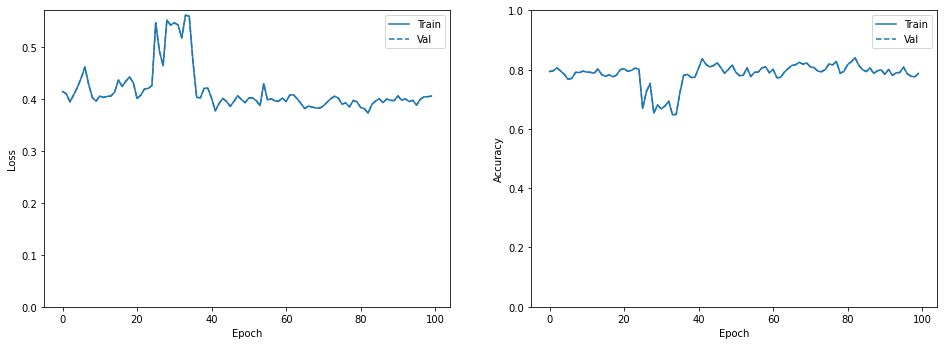

In [ ]:
plot_metrics(history)

35985/35985 [==============================] - 52s 1ms/step


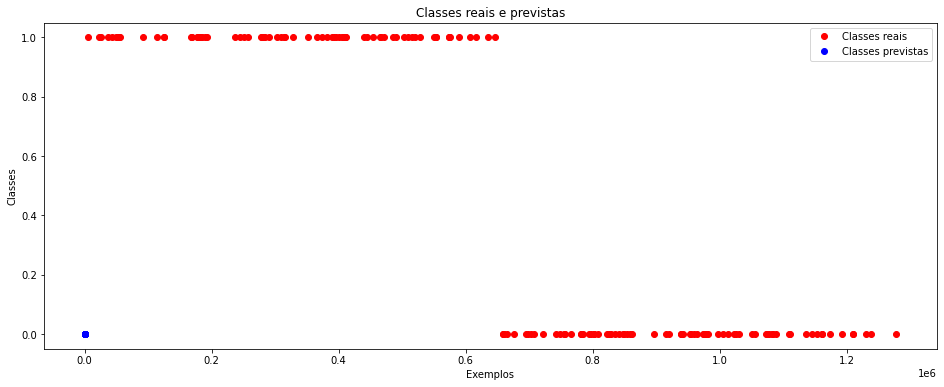

In [ ]:
y_test_prev = rna.predict(X_train)
# Cálculo das classes previstas
classe = np.argmax(y_test_prev, axis=1)
# Gráfico das classes reais e previstas (100 primeiros exemplos)
plt.figure(figsize=(16, 6))
plt.plot(y_train[:150], 'ro', label='Classes reais')
plt.plot(classe[:150], 'bo', label='Classes previstas')
plt.title('Classes reais e previstas')
plt.xlabel('Exemplos')
plt.ylabel('Classes')
plt.legend()
plt.show()

## Export

In [ ]:
rna.save("/content/Export/AIV5")
rna.save("/content/Export/AIV5.h5")

In [ ]:
import joblib
joblib.dump(rna, "/content/Export/AIV5.joblib")

['/content/Export/AIV5.joblib']

# Recursos

[Big Data: Como instalar o PySpark no Google Colab](https://colab.research.google.com/github/carlosfab/sigmoidal_ai/blob/master/Big_Data_Como_instalar_o_PySpark_no_Google_Colab.ipynb#scrollTo=gpJqWggpPKXO) - 2022-06-17

[Pandas vs PySpark DataFrame With Examples](https://sparkbyexamples.com/pyspark/pandas-vs-pyspark-dataframe-with-examples/) - 2022-06-17

[Spark with Python (PySpark) Tutorial For Beginner](https://sparkbyexamples.com/pyspark-tutorial/) - 2022-06-17

[4 strategies how to deal with large datasets in Pandas](https://www.vantage-ai.com/en/blog/4-strategies-how-to-deal-with-large-datasets-in-pandas) - 2022-08-18

[Dask Docs - Dataframe](https://docs.dask.org/en/stable/dataframe.html) - 2022-08-19

[Dask Docs - Dataframe best practices](https://docs.dask.org/en/stable/dataframe-best-practices.html) - 2022-08-19

[Modern Pandas (Part 1)](https://tomaugspurger.github.io/modern-1-intro) - 2022-08-19

[DDoS sources & var types](https://www.unb.ca/cic/datasets/ids-2018.html) - 2022-08-22

[Kaggle - Binary Classification class](https://www.kaggle.com/code/ryanholbrook/binary-classification) - 2022-08-23

[Tensorflow - Export and import](https://www.tensorflow.org/guide/keras/save_and_serialize) - 2022-08-23

[PDF - Convolutional Neural Network: Text Classification Model for Open Domain Question Answering System](https://arxiv.org/ftp/arxiv/papers/1809/1809.02479.pdf) - 2022-10-10

[Text classification using CNN](https://medium.com/voice-tech-podcast/text-classification-using-cnn-9ade8155dfb9) - 2022-10-10

[Video - Convolutional neural networks for well log analysis tutorial](https://www.youtube.com/watch?v=zOv3TnjKYmg) - 2022-10-10

[Deep Convolutional Neural Networks for Log Event Classification on Distributed Cluster Systems](https://www.researchgate.net/publication/330625658_Deep_Convolutional_Neural_Networks_for_Log_Event_Classification_on_Distributed_Cluster_Systems) - 2022-10-10

[StackOverFlow - Remove space](https://stackoverflow.com/questions/41476150/remove-or-replace-spaces-in-column-names) - 2022-10-11

[Google cloud - Exporting model as joblib](https://cloud.google.com/vertex-ai/docs/training/exporting-model-artifacts#joblib) - 2022-10-11